## V.1 Exploring the green reds

In [1]:
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation

In [2]:
dataset_path = './resources/winequality-red.csv'

try:
    wine_data = pd.read_csv(dataset_path, sep=';')
except FileNotFoundError:
    print('[-] Set `dataset_path` with correct value')

### a) Write a function that will plot a scatterplot matrix of your red wine data

In [3]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    """
    Plots a scatterplot matrix of data. Samples with quality over `good_threshold`
    are plotted as one color and samples below `bad_threshold` as another.

    :param pd.DataFrame wine_data:
    :param int good_threshold:
    :param int bad_threshold:

    :returns: result matplotlib.pyplot.figure object
    """
    num_samples, num_features = wine_data.shape

    fig, axes = plt.subplots(nrows=num_features,
                             ncols=num_features, figsize=(18,18))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    
    feature_names = wine_data.columns
    for i, label in enumerate(feature_names):
        axes[i, i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                            ha='center', va='center')
    
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality'] < bad_threshold)]
    
    for i in range(num_features):
        for j in range(i + 1, num_features):
            axes[i, j].scatter(good_wines.iloc[:, j], good_wines.iloc[:, i], c=['g'], marker='.')
            axes[i, j].scatter(bad_wines.iloc[:, j], bad_wines.iloc[:, i], c=['r'], marker='.')
            axes[j, i].scatter(good_wines.iloc[:, i], good_wines.iloc[:, j], c=['g'], marker='.')
            axes[j, i].scatter(bad_wines.iloc[:, i], bad_wines.iloc[:, j], c=['r'], marker='.')

    if save_plot:
        plt.savefig('./scatterplot-matrix.png')
    
    return fig

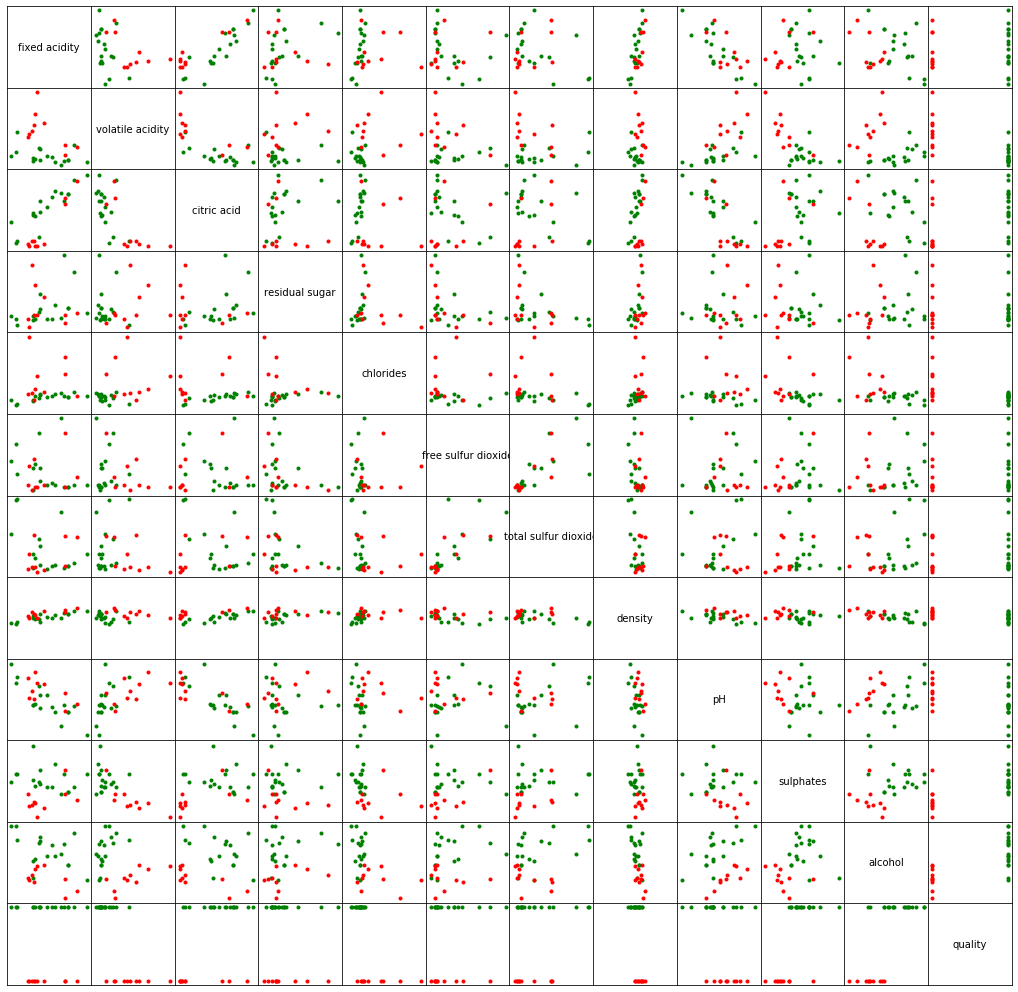

In [4]:
fig = plot_scatter_matrix(wine_data, 7, 4, True)
plt.show(fig)

### b) 
#### Good factors: alcohol, pH, sulphates
####  Bad factors: density, chlorides